# HW04

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

pd.options.mode.copy_on_write = True
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 第一題

請匯入檔案 `KoreaDrama_re.csv`，計算所有電影的情緒分數，x軸為電影名稱，y軸分正向情緒分數、負向情緒分數、正向情緒分數/負向情緒分數。正向情緒分數、負向情緒分數以長條圖表示，左側Y軸為座標軸。

正向情緒分數/負向情緒分數以折線圖表示，右側Y軸為座標軸。

### 匯入原始資料

In [2]:
# 匯入原始爬蟲資料
df = pd.read_csv('data/KoreaDrama_re.csv')
df.head()

,Unnamed: 0,標題,時間,內容
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ..."
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=..."


In [3]:
# 合併標題與內容為所有文
df["所有文"] = df["標題"] + df["內容"]

# 無意義字元 REGEX
df["所有文"] = df["所有文"].replace(r'<.*?>', "", regex=True)
df["所有文"] = df["所有文"].replace(r'https?://.+?\s', "", regex=True)
df["所有文"] = df["所有文"].replace(r'原文內容|原文連結|作者|標題|時間|看板', "", regex=True)
df["所有文"] = df["所有文"].replace(r'※|‧|╦|╔|╗|║|╠|╬|╰|╩|╯|╭|╮|│|╪|─|《|》|_|。|、|（|）|　|\*|※|~|○|"|"|～|@|＋|\r|▁|\)|\(|\-|=|\?|,|!|…|&|;|『|』|#|＝|\\l', "", regex=True)
df["所有文"] = df["所有文"].replace(r'\s+', " ", regex=True)

df.head()

,Unnamed: 0,標題,時間,內容,所有文
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ...",[LIVE] 2018 SBS 演技大賞2018 SBS 演技大賞 日期：2018.12.3...
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...,[LIVE] 2018 KBS 演技大賞 2018 KBS演技大賞 直播：2018/12/3...
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...,[心得] 值得一看的就算死也喜歡雷繼金科長後終於又看到一部讓人忍不住一集接著一集看下去的戲 ...
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10以下皆爆雷，請慎入！ E10 喪屍...
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=...",[心得]金材昱徐睿知：另有他路雷 雖然是電影，但還是發在這邊了，韓劇韓影一家親？ 2015的...


### 對所有文做分類

In [4]:
movies = [
    "成為王的男人",
    "皇后的品格",
    "赤月青日",
    "神的測驗",
    "死之詠讚",
    "加油吧威基基",
    "皮諾丘",
    "魔女寶鑑",
    "男朋友",
    "來自星星的你",
]

### 進行情感分析

In [5]:
from snownlp import SnowNLP

def get_sentiment(text: str) -> float|int:
    s = SnowNLP(text)
    return s.sentiments

df["情緒分數"] = df["所有文"].apply(get_sentiment)
df["情緒標籤"] = df["情緒分數"].apply(lambda x: "Positive" if x >= 0.5 else "Negative")
df.head()


,Unnamed: 0,標題,時間,內容,所有文,情緒分數,情緒標籤
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ...",[LIVE] 2018 SBS 演技大賞2018 SBS 演技大賞 日期：2018.12.3...,0.978150,Positive
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...,[LIVE] 2018 KBS 演技大賞 2018 KBS演技大賞 直播：2018/12/3...,1.000000,Positive
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...,[心得] 值得一看的就算死也喜歡雷繼金科長後終於又看到一部讓人忍不住一集接著一集看下去的戲 ...,0.846763,Positive
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10以下皆爆雷，請慎入！ E10 喪屍...,0.000022,Negative
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=...",[心得]金材昱徐睿知：另有他路雷 雖然是電影，但還是發在這邊了，韓劇韓影一家親？ 2015的...,1.000000,Positive


### 將 dataframe 進行分類

In [6]:
movie_sentiment: list[dict] = []
movie_pn_score: list[dict] = []

for movie in movies:
    df_movie = df[df["所有文"].str.contains(movie)]
    df_movie_group = df_movie.groupby(["情緒標籤"])
    df_movie_score = df_movie_group["情緒分數"].mean()

    for label in ["Positive", "Negative"]:
        movie_sentiment.append({
            "電影名稱": movie,
            "情緒標籤": label,
            "情緒分數": df_movie_score.get(label, 0),
            "情緒筆數": len(df_movie[df_movie["情緒標籤"] == label]),
        })

    df_positive_score = df_movie_score.get("Positive", 0)
    df_negative_score = df_movie_score.get("Negative", 0)
    df_pn_score = df_positive_score / df_negative_score if df_negative_score != 0 else 0

    movie_pn_score.append({
        "電影名稱": movie,
        "P/N 比值": df_pn_score,
    })

In [7]:
movie_sentiment_df = pd.DataFrame(movie_sentiment)
movie_sentiment_df

,電影名稱,情緒標籤,情緒分數,情緒筆數
0,成為王的男人,Positive,1.000000e+00,1
1,成為王的男人,Negative,1.725255e-05,1
2,皇后的品格,Positive,9.799193e-01,16
3,皇后的品格,Negative,1.781085e-03,8
4,赤月青日,Positive,9.885320e-01,9
5,赤月青日,Negative,7.414556e-02,4
6,神的測驗,Positive,9.970294e-01,10
7,神的測驗,Negative,8.142471e-12,7
8,死之詠讚,Positive,9.999745e-01,6
9,死之詠讚,Negative,4.880209e-03,3


In [8]:
movie_pn_score_df = pd.DataFrame(movie_pn_score)
movie_pn_score_df

,電影名稱,P/N 比值
0,成為王的男人,5.796245e+04
1,皇后的品格,5.501811e+02
2,赤月青日,1.333231e+01
3,神的測驗,1.224480e+11
4,死之詠讚,2.049040e+02
5,加油吧威基基,2.002566e+09
6,皮諾丘,2.251707e+16
7,魔女寶鑑,0.000000e+00
8,男朋友,3.005093e+01
9,來自星星的你,1.443001e+03


### 針對計算出的數值進行畫圖

呈現正負向情緒分數和筆數。

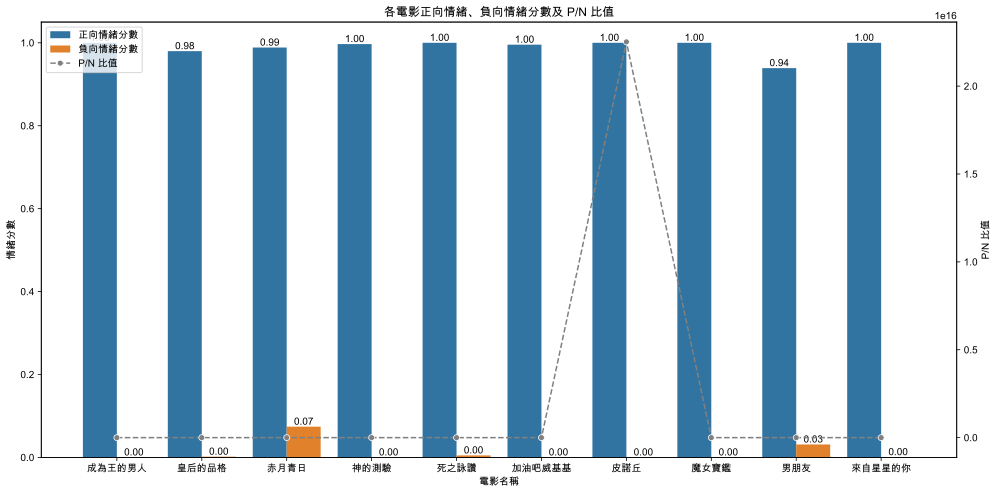

In [9]:
from matplotlib.container import BarContainer
import seaborn as sns

# 準備繪圖資料
plt.figure(figsize=(14, 7))

ax = sns.barplot(x="電影名稱", y="情緒分數", hue="情緒標籤", data=movie_sentiment_df)
for i in ax.containers:
    assert isinstance(i, BarContainer)
    ax.bar_label(i, fmt='%.2f')

# line 虛線, 有點, gray
# 右邊坐標軸也要有 P/N 比值
ax2 = ax.twinx()
sns.lineplot(x="電影名稱",
             y="P/N 比值",
             data=movie_pn_score_df,
             label="P/N 比值",
             ax=ax2,
             linestyle="--",
             marker="o",
             color="gray",
             )

# 合併 legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ["正向情緒分數", "負向情緒分數", "P/N 比值"], loc="upper left")
ax.legend().remove()

plt.title("各電影正向情緒、負向情緒分數及 P/N 比值")
plt.tight_layout()
plt.show()

## 第二題

請匯入檔案 `KoreaDrama_re.csv`，計算皇后的品格的情緒分數，

1. x軸為時間，y軸分正向情緒分數、負向情緒分數，以長條圖表示，左側Y軸顯示刻度。
2. 正向情緒分數/負向情緒分數，以折線圖表示，右側Y軸顯示刻度，當p/n為空值時, 以零表示

### 匯入原始資料

In [10]:
df_q2 = pd.read_csv('data/KoreaDrama_re.csv')

# 時間格式 = YYYYMMDD
df_q2["時間"] = pd.to_datetime(df_q2["時間"], format="%Y%m%d")
df_q2.sort_values(by="時間", inplace=True)
df_q2.head()

,Unnamed: 0,標題,時間,內容
261,274,[置底] 12月難以發文討論之「閒聊區」,2018-12-01,"<span class=""f3 hl"">—— 想要閒聊嗎？——</span>\r\n\r\n..."
253,266,[心得] 「皇后的品格」心得和皇室後裔見面分享,2018-12-01,\r\n\r\n\r\n從之前就很期待《皇后的品格》，\r\n\r\n主要原因是開啟我韓劇大...
254,267,[LIVE] OCN Priest 司祭 EP3,2018-12-01,絕對不能回來的東西回來了…\r\n\r\n 2018 年南部天主教醫院所發生…無法用科...
255,268,[LIVE] tvN 阿爾罕布拉宮的回憶 EP1,2018-12-01,"<span class=""f6 b3 hl"">★ 直播連結:</span>\r\n\r\n官..."
260,273,[心得] MBC 赤月青日 EP.5~EP.8 (雷),2018-12-01,"(從第6集開始有點驚悚的感覺了...)\r\n\r\n\r\n\r\n\r\n\r\n""有詩..."


In [11]:
# 合併標題與內容為所有文
df_q2["所有文"] = df_q2["標題"] + df_q2["內容"]

# 無意義字元 REGEX
df_q2["所有文"] = df_q2["所有文"].replace(r'<.*?>', "", regex=True)
df_q2["所有文"] = df_q2["所有文"].replace(r'https?://.+?\s', "", regex=True)
df_q2["所有文"] = df_q2["所有文"].replace(r'原文內容|原文連結|作者|標題|時間|看板', "", regex=True)
df_q2["所有文"] = df_q2["所有文"].replace(r'※|‧|╦|╔|╗|║|╠|╬|╰|╩|╯|╭|╮|│|╪|─|《|》|_|。|、|（|）|　|\*|※|~|○|"|"|～|@|＋|\r|▁|\)|\(|\-|=|\?|,|!|…|&|;|『|』|#|＝|\\l', "", regex=True)
df_q2["所有文"] = df_q2["所有文"].replace(r'\s+', " ", regex=True)

df_q2.head()

,Unnamed: 0,標題,時間,內容,所有文
261,274,[置底] 12月難以發文討論之「閒聊區」,2018-12-01,"<span class=""f3 hl"">—— 想要閒聊嗎？——</span>\r\n\r\n...",[置底] 12月難以發文討論之「閒聊區」—— 想要閒聊嗎？—— ・只要在板規規範下，想要聊東...
253,266,[心得] 「皇后的品格」心得和皇室後裔見面分享,2018-12-01,\r\n\r\n\r\n從之前就很期待《皇后的品格》，\r\n\r\n主要原因是開啟我韓劇大...,[心得] 「皇后的品格」心得和皇室後裔見面分享 從之前就很期待皇后的品格， 主要原因是開啟我...
254,267,[LIVE] OCN Priest 司祭 EP3,2018-12-01,絕對不能回來的東西回來了…\r\n\r\n 2018 年南部天主教醫院所發生…無法用科...,[LIVE] OCN Priest 司祭 EP3 絕對不能回來的東西回來了 2018 年南部...
255,268,[LIVE] tvN 阿爾罕布拉宮的回憶 EP1,2018-12-01,"<span class=""f6 b3 hl"">★ 直播連結:</span>\r\n\r\n官...",[LIVE] tvN 阿爾罕布拉宮的回憶 EP1★ 直播連結: 官方tving: 92flv...
260,273,[心得] MBC 赤月青日 EP.5~EP.8 (雷),2018-12-01,"(從第6集開始有點驚悚的感覺了...)\r\n\r\n\r\n\r\n\r\n\r\n""有詩...",[心得] MBC 赤月青日 EP.5EP.8 雷從第6集開始有點驚悚的感覺了... 有詩的死...


### 篩選出「皇后的品格」的內容

In [12]:
df_q2_queen = df_q2[df_q2["所有文"].str.contains("皇后")]
df_q2_queen.head()

,Unnamed: 0,標題,時間,內容,所有文
253,266,[心得] 「皇后的品格」心得和皇室後裔見面分享,2018-12-01,\r\n\r\n\r\n從之前就很期待《皇后的品格》，\r\n\r\n主要原因是開啟我韓劇大...,[心得] 「皇后的品格」心得和皇室後裔見面分享 從之前就很期待皇后的品格， 主要原因是開啟我...
242,255,[情報] 11月新劇：《皇后的品格》 SBS,2018-12-03,"<span class=""f3 b1 hl"">劇 名</span> <span clas...",[情報] 11月新劇：皇后的品格 SBS劇名 皇后的品格 The Last Empress ...
225,238,[LIVE] 皇后的品格 EP09.10,2018-12-05,"<span class=""f3 b1 hl"">劇 名</span> <span clas...",[LIVE] 皇后的品格 EP09.10劇名 皇后的品格 The Last Empress ...
220,233,[心得] 皇后的品格心得至ep9-10,2018-12-06,\r\n以下會提及劇情雷喔\r\n\r\n追完姐姐還活著之後有點空虛，看到皇后的品格就趕快f...,[心得] 皇后的品格心得至ep910 以下會提及劇情雷喔 追完姐姐還活著之後有點空虛，看到皇...
180,193,[心得] 紓壓神劇 皇后的品格,2018-12-10,"姐好久沒來韓劇版了\r\n\r\n但現在追看的其中一部\r\n\r\n""皇后的品格""\r\n...",[心得] 紓壓神劇 皇后的品格姐好久沒來韓劇版了 但現在追看的其中一部 皇后的品格 非常之狗...


### 進行情感分析

In [13]:
def get_sentiment(text: str) -> float|int:
    s = SnowNLP(text)
    return s.sentiments

df_q2_queen["情緒分數"] = df_q2_queen["所有文"].apply(get_sentiment)
df_q2_queen["情緒標籤"] = df_q2_queen["情緒分數"].apply(lambda x: "Positive" if x >= 0.5 else "Negative")
df_q2_queen.head()


,Unnamed: 0,標題,時間,內容,所有文,情緒分數,情緒標籤
253,266,[心得] 「皇后的品格」心得和皇室後裔見面分享,2018-12-01,\r\n\r\n\r\n從之前就很期待《皇后的品格》，\r\n\r\n主要原因是開啟我韓劇大...,[心得] 「皇后的品格」心得和皇室後裔見面分享 從之前就很期待皇后的品格， 主要原因是開啟我...,6.930001e-04,Negative
242,255,[情報] 11月新劇：《皇后的品格》 SBS,2018-12-03,"<span class=""f3 b1 hl"">劇 名</span> <span clas...",[情報] 11月新劇：皇后的品格 SBS劇名 皇后的品格 The Last Empress ...,9.999999e-01,Positive
225,238,[LIVE] 皇后的品格 EP09.10,2018-12-05,"<span class=""f3 b1 hl"">劇 名</span> <span clas...",[LIVE] 皇后的品格 EP09.10劇名 皇后的品格 The Last Empress ...,1.000000e+00,Positive
220,233,[心得] 皇后的品格心得至ep9-10,2018-12-06,\r\n以下會提及劇情雷喔\r\n\r\n追完姐姐還活著之後有點空虛，看到皇后的品格就趕快f...,[心得] 皇后的品格心得至ep910 以下會提及劇情雷喔 追完姐姐還活著之後有點空虛，看到皇...,1.000000e+00,Positive
180,193,[心得] 紓壓神劇 皇后的品格,2018-12-10,"姐好久沒來韓劇版了\r\n\r\n但現在追看的其中一部\r\n\r\n""皇后的品格""\r\n...",[心得] 紓壓神劇 皇后的品格姐好久沒來韓劇版了 但現在追看的其中一部 皇后的品格 非常之狗...,3.134383e-07,Negative


## 整理 dataframe

In [14]:
df_q2_queen_score = df_q2_queen.groupby(["時間", "情緒標籤"])["情緒分數"].mean().reset_index()
df_q2_queen_score.head()

,時間,情緒標籤,情緒分數
0,2018-12-01,Negative,6.930001e-04
1,2018-12-03,Positive,9.999999e-01
2,2018-12-05,Positive,1.000000e+00
3,2018-12-06,Positive,1.000000e+00
4,2018-12-10,Negative,3.134383e-07


## 繪製圖形

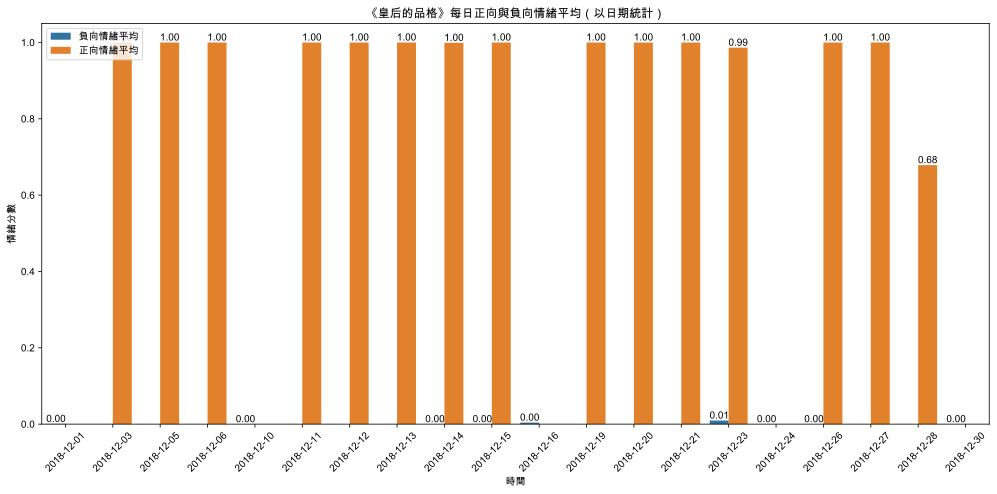

In [22]:
from matplotlib.container import BarContainer
import seaborn as sns

# 準備繪圖資料
plt.figure(figsize=(14, 7))

ax = sns.barplot(x="時間", y="情緒分數", hue="情緒標籤", data=df_q2_queen_score)
for i in ax.containers:
    assert isinstance(i, BarContainer)
    ax.bar_label(i, fmt='%.2f')

# 標籤重新命名 (Positive -> 正向情緒平均, Negative -> 負向情緒平均)
h, l = ax.get_legend_handles_labels()
new_labels = {"Negative": "負向情緒平均", "Positive": "正向情緒平均"}
ax.legend(h, [new_labels[label] for label in l], loc="upper left")

plt.title("《皇后的品格》每日正向與負向情緒平均（以日期統計）")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()